In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#load dataset
url='https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the data and calculate the following

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

a. Measure the dispersion in both and interpret the results.

b. Calculate mean and 5% confidence interval and plot it in a graph

c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.

d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.


In [14]:
df.describe()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
count,100.000000,100.000000,100.000000
mean,50.500000,133.910000,128.360000
std,29.011492,6.598278,6.888022
min,1.000000,120.000000,118.000000
25%,25.750000,128.000000,123.000000
50%,50.500000,135.000000,128.000000
75%,75.250000,139.250000,135.000000
max,100.000000,148.000000,141.000000


##### a. Measure the dispersion in both and interpret the results.


*To measure the dispersion in Blood Pressure Before and Blood Pressure After columns,*

*we have to claculate the **range** , **variance** , **standard deviation*** 

In [34]:
#filter the data from the dataframe
blood_pressure_before = df[' Blood Pressure Before (mmHg)']
blood_pressure_after = df[' Blood Pressure After (mmHg)'] 

#=======range-calculation==========

# Blood Pressure Before
max_pressure_before = blood_pressure_after.max()
min_pressure_before = blood_pressure_before.min()
range_blood_pressure_before = max_pressure_before - min_pressure_before

# Blood Pressure After
max_pressure_after = blood_pressure_after.max()
min_pressure_after = blood_pressure_after.min()
range_blood_pressure_after = max_pressure_after - min_pressure_after

#==========variance-calculation==========

# Blood Pressure Befor
variance_before = df[' Blood Pressure Before (mmHg)'].var()
# Blood Pressure After
variance_after = df[' Blood Pressure After (mmHg)'].var()

#===========standard deviation============
std_before = df.describe()[' Blood Pressure Before (mmHg)'][2]
std_after = df.describe()[' Blood Pressure After (mmHg)'][2]

print("Range of Blood Pressure Before and then After : " + "[" + str(range_blood_pressure_before) + " - " + str(range_blood_pressure_after) + "]")
print("Variance of Blood Pressure Before and then After : " + "[" + str(variance_before) + " - " + str(variance_after) + "]")
print("Standard Deviation of Blood Pressure Before and then After : " + "[" + str(std_before) + " - " + str(std_after) + "]")
print(100*"=")
print("Interpretition =>")
print("Since the range varies from 21 - 23 so there is not too much variablity in the blood pressure measurements before the event or treatment compared to after.")
print(100*"-")
print("A larger variance or standard deviation indicates greater dispersion or variability in the blood pressure data.\n But there is no huge difference in the range so there is little diversity in the blood pressure data")


Range of Blood Pressure Before and then After : [21 - 23]
Variance of Blood Pressure Before and then After : [43.53727272727271 - 47.4448484848485]
Standard Deviation of Blood Pressure Before and then After : [6.598278012275075 - 6.8880221025232276]
Interpretition =>
Since the range varies from 21 - 23 so there is not too much variablity in the blood pressure measurements before the event or treatment compared to after.
----------------------------------------------------------------------------------------------------
A larger variance or standard deviation indicates greater dispersion or variability in the blood pressure data.
 But there is no huge difference in the range so there is little diversity in the blood pressure data


##### b. Calculate mean and 5% confidence interval and plot it in a graph

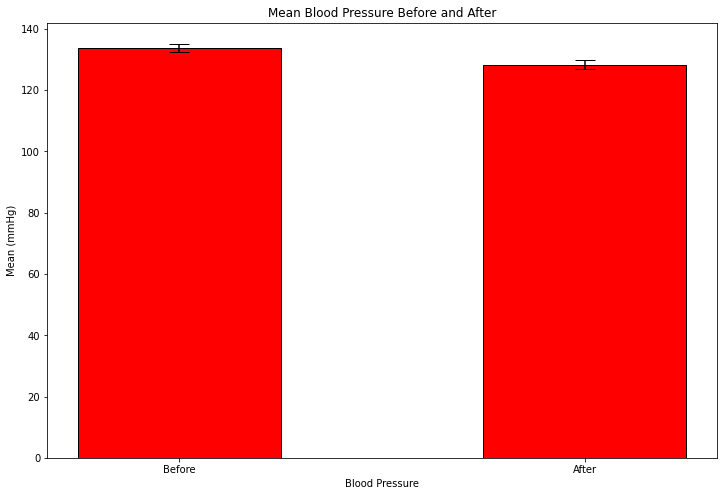

In [45]:
# Calculate mean and confidence interval
mean_before = df[' Blood Pressure Before (mmHg)'].mean()
mean_after = df[' Blood Pressure After (mmHg)'].mean()

std_before = df[' Blood Pressure Before (mmHg)'].std()
std_after = df[' Blood Pressure After (mmHg)'].std()

n = len(df)

# For a 5% confidence level, the critical value would be 1.96.

confidence_interval_before = 1.96 * (std_before / np.sqrt(n))
confidence_interval_after = 1.96 * (std_after / np.sqrt(n))

# Plot the results
labels = ['Before', 'After']
means = [mean_before, mean_after]
confidence_intervals = [confidence_interval_before, confidence_interval_after]

plt.figure(figsize=(12,8))
plt.bar(labels, means, yerr=confidence_intervals, capsize=10,width=0.5,edgecolor="black",color='red')
plt.xlabel('Blood Pressure')
plt.ylabel('Mean (mmHg)')
plt.title('Mean Blood Pressure Before and After')
plt.show()



##### c. Calculate the Mean absolute deviation and Standard deviation and interpret the results

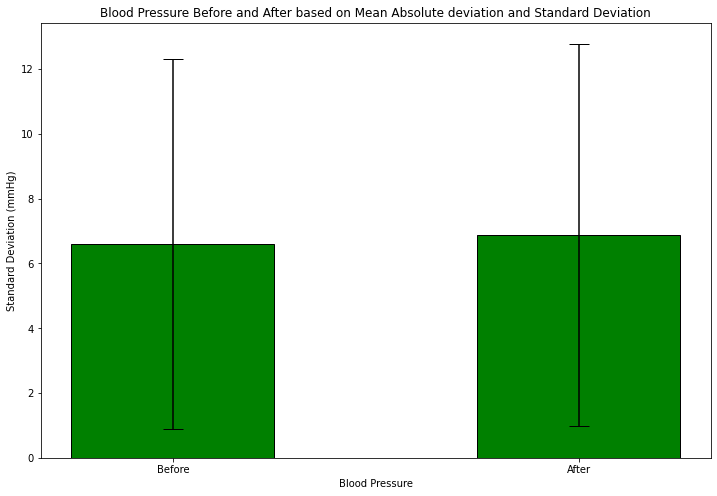

****************************************************************************************************
Interpretation before Blood Presure =>
The MAD for the 'Blood Pressure Before' data is 5.7118 mmHg,which indicates that, on average, the individual blood pressure measurements deviate from the mean by approximately 5.7118 mmHg.
The SD for the 'Blood Pressure Before' data is approximately 6.598278012275075 mmHg, which represents the spread or dispersion of the blood pressure values around the mean.
Interpretation after Blood Presure =>
The MAD for the 'Blood Pressure After' data is 5.9 mmHg,which indicates that, on average, the individual blood pressure measurements deviate from the mean by approximately 5.9 mmHg.
The SD for the 'Blood Pressure After' data is approximately 6.8880221025232276 mmHg, which represents the spread or dispersion of the blood pressure values around the mean.


In [53]:
# calculation mean absolute deviation
mad_before = df[' Blood Pressure Before (mmHg)'].mad() 
mad_after = df[' Blood Pressure After (mmHg)'].mad()

# calculate standard deviation
std_before = df[' Blood Pressure Before (mmHg)'].std()
std_after = df[' Blood Pressure After (mmHg)'].std()

# Plot the graph
labels = ['Before', 'After']
std = [std_before, std_after]
mad = [mad_before, mad_after]

plt.figure(figsize=(12,8))
plt.bar(labels, std, yerr=mad, capsize=10,width=0.5,edgecolor="black",color='green')
plt.xlabel('Blood Pressure')
plt.ylabel('Standard Deviation (mmHg)')
plt.title('Blood Pressure Before and After based on Mean Absolute deviation and Standard Deviation')
plt.show()

print(100*"*")
print("Interpretation before Blood Presure =>")

print("The MAD for the 'Blood Pressure Before' data is " +str(mad_before) + " mmHg," "which indicates that, on average, the individual blood pressure measurements deviate from the mean by approximately " +str(mad_before)+ " mmHg.")

print("The SD for the 'Blood Pressure Before' data is approximately " +str(std_before) + " mmHg, which represents the spread or dispersion of the blood pressure values around the mean.")

print(100*"=")

print("Interpretation after Blood Presure =>")

print("The MAD for the 'Blood Pressure After' data is " +str(mad_after) + " mmHg," "which indicates that, on average, the individual blood pressure measurements deviate from the mean by approximately " +str(mad_after)+ " mmHg.")

print("The SD for the 'Blood Pressure After' data is approximately " +str(std_after) + " mmHg, which represents the spread or dispersion of the blood pressure values around the mean.")

 


##### d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [65]:
# for finding the correlation we have to use pearson correlation
from scipy.stats import pearsonr
blood_pressure_before = df[' Blood Pressure Before (mmHg)']
blood_pressure_after = df[ ' Blood Pressure After (mmHg)']
corr , p_value = pearsonr(blood_pressure_before , blood_pressure_after)

print("Coorelation coefficient : " + str(corr))
print("P-value : " +str(p_value))

print("\n==============Result==============")
print("The correlation coefficient between the 'Blood Pressure Before' and 'Blood Pressure After' columns is approximately " +str(corr) + " .\nTo check the significance of this correlation coefficient at a 1% level of significance,\nwe compare the p-value " + str(p_value) + " to the significance level (0.01).")
print("\n")
print("Since the p-value " + str(p_value) + " is less than the significance level (0.01),\nwe reject the null hypothesis that there is no correlation between the two variables.\nTherefore, the correlation coefficient is statistically significant at a 1% level of significance,\nindicating a strong positive correlation between the blood pressure before and after.")

Coorelation coefficient : 0.9779485966556021
P-value : 1.8097381433059708e-68

==============Result==============
The correlation coefficient between the 'Blood Pressure Before' and 'Blood Pressure After' columns is approximately 0.9779485966556021 .
To check the significance of this correlation coefficient at a 1% level of significance,
we compare the p-value 1.8097381433059708e-68 to the significance level (0.01).


Since the p-value 1.8097381433059708e-68 is less than the significance level (0.01),
we reject the null hypothesis that there is no correlation between the two variables.
Therefore, the correlation coefficient is statistically significant at a 1% level of significance,
indicating a strong positive correlation between the blood pressure before and after.
